# Lesson 6 Assignment - Advertising Sales Regression

## Author - AlexSkrn



### Instructions  
Perform four different linear regressions on advertising sales data located in 'Advertising.csv'.  Your dependent feature is 'sales', a measure of sales of a product in a given market in thousands of dollars. 

The independent features for each of the first 3 separate regressions are:

 1. 'TV': advertising dollars spent on TV ads for a single product in a given market
 2. 'radio': advertising dollars spent on radio ads
 3. 'newspaper': advertising dollars spent on newspaper ads

For the first 3 linear regression performed:

- Produce a labeled graph showing the best fit line with the data points.
- Interpret both the slope and y-intercept.
 
The final regression(#4) includes all 3 features: (a) TV, (b) radio, and (c) newspaper. 
- Interpret each partial slope and the intercept parameters.
- Interpret the adjusted R-squared.
- Find and report the mean-squared error.

#### Please prepare this information for a client who may not understand what the parameters mean.


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
%matplotlib inline

In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Advertising.csv'
ad_data = pd.read_csv(filename, index_col=0)
print(ad_data.head())
print(ad_data.shape)
ad_data.describe()

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
(200, 4)


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Vizualizing the data

In [3]:
def plot_sales(df, axis, x, y_line = None):
    """Plot sales data vs x-column, with regression line"""
    axis.scatter(df[x], df['sales'])
    if y_line is not None:
        axis.plot(df[x], y_line, linewidth=2)
    axis.grid(True)
    axis.set_xlabel('{} expenses, $'.format(x.upper()))
    axis.set_ylabel('Sales, thou $')
    axis.set_title('{} expenses vs Sales'.format(x.upper()))

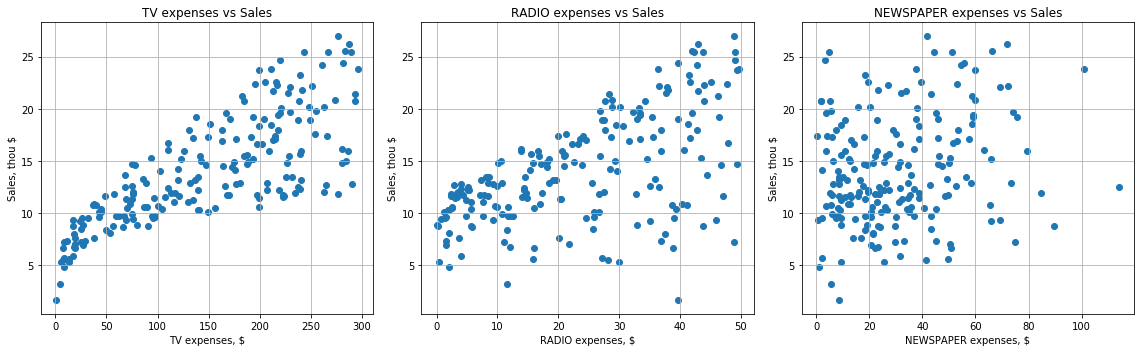

In [4]:
# Define axes for the plots
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 5))
ax0, ax1, ax2 = axes.flat

plot_sales(ad_data, ax0, 'TV')
plot_sales(ad_data, ax1, 'radio')
plot_sales(ad_data, ax2, 'newspaper')

plt.tight_layout()
plt.show()

## Building a Model

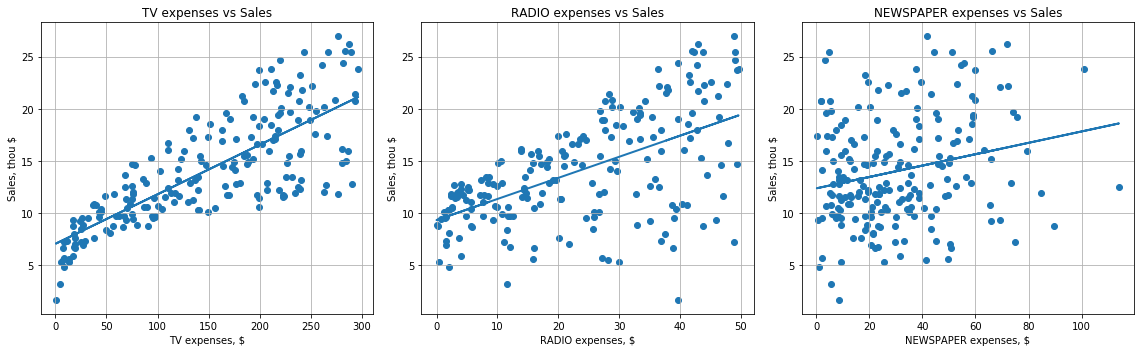

Intercepts: expected Sales (in thousands of dollars) when Spendings on ads are 0
Slope: when we increase Spendings by $1 then we expect that Sales will go up by the Slope value

TV ads vs sales
Intercept: 7.03259
Slope : 0.04754

Radio ads vs sales
Intercept: 9.31164
Slope : 0.20250

TV ads vs sales
Intercept: 12.35141
Slope : 0.05469



In [5]:
# Initialize 3 models
linear_model_tv = LinearRegression()
linear_model_radio = LinearRegression()
linear_model_newspaper = LinearRegression()

# Values common for all the three models
n_points = len(ad_data['sales'])
y_output = ad_data['sales'].values.reshape(n_points, 1)

# Fit the first model to the data - TV; and get predictions
x_input_tv = ad_data['TV'].values.reshape(n_points, 1)
linear_model_tv.fit(x_input_tv, y_output)
y_pred_tv = linear_model_tv.predict(x_input_tv)

# Fit the second model to the data - radio; and get predictions
x_input_radio = ad_data['radio'].values.reshape(n_points, 1)
linear_model_radio.fit(x_input_radio, y_output)
y_pred_radio = linear_model_radio.predict(x_input_radio)

# Fit the third model to the data - newspapers; and get predictions
x_input_news = ad_data['newspaper'].values.reshape(n_points, 1)
linear_model_newspaper.fit(x_input_news, y_output)
y_pred_news = linear_model_newspaper.predict(x_input_news)

# Define axes for the plots and plot the data and regression lines
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 5))
axis0, axis1, axis2 = axes.flat

plot_sales(ad_data, axis0, 'TV', y_pred_tv)
plot_sales(ad_data, axis1, 'radio', y_pred_radio)
plot_sales(ad_data, axis2, 'newspaper', y_pred_news)

plt.tight_layout()
plt.show()

def print_params(model, title):
    """Print model parameters - slope (m) and y-intercept (b)."""
    print(title)
    print('Intercept: {0:.5f}'.format(model.intercept_[0]))
    print('Slope : {0:.5f}'.format(model.coef_[0][0]))
    print()
    
print('Intercepts: expected Sales (in thousands of dollars) when Spendings on ads are 0')
print('Slope: when we increase Spendings by $1 then we expect that Sales will go up by the Slope value')
print()
print_params(linear_model_tv, 'TV ads vs sales')
print_params(linear_model_radio, 'Radio ads vs sales')
print_params(linear_model_newspaper, 'TV ads vs sales')

## Multiple regression

In [6]:
result = sm.ols(formula = "sales ~ TV + radio + newspaper", data = ad_data).fit()

In [7]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 17 Feb 2019   Prob (F-statistic):           1.58e-96
Time:                        19:41:23   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpreting the rusults of multiple regression

Adjusted R-squared value is 0.896, meaning that this model explains 89.6% of the variance in the dependent variable, sales. 

TV and radio predictor variables are statistically significant in estimating the sales value (because the p-value is below alpha = 0.05, i.e. in the rejection area with respect to Ho that the variable has zero influence). The  newspaper variable, however, does not contribute to my model because its p-value is 0.860 which is above my alpha, meaning that I cannot reject Ho that this variable, newspaper ads spendings, has zero effect on the output variable, sales.

The partial slopes of TV, radio and newspaper variables are 0.0458, 0.1885 and -0.0010, respectively. These numbers show that as spendings on TV ads increase by \\$1, sales will increase by \\$0.0458 thousand; when spendings on radio ads increase by \\$ 1, sales will increase increase by \\$0.1885 thousand. Since the newspaper variable has no effect on the target variable, sales, its slope does not mean anything.

The intercept value of 2.9389 shows the expected sales value in thousands of dollars if there are no spendings on any of the ads.

In [8]:
print('Mean-Squared Error: {}'.format(result.mse_model))

Mean-Squared Error: 1620.1078290326043
